# Wastewater treatment network problem

## Introduction 

We consider the wastewater treatment network problem. The goal of a wastewater treatment network is to lower contaminants concentration in wasterwater to the required quality standards. A wastewater treatment network contains splitters, mixers and treatment units. Splitters divide incoming flows (wastewater), while mixers combine them and treatment units decrease the contaminant's concentration from the incoming flow. The problem is to determine how much of the flow from each splitter should go to each mixer to minimize the flow sent to the expensive treatment units; ensuring that the final output meets the required quality standards at the lowest possible cost.

Here is an example of an instance and one if its solutions. The thickness of an arc in the solution is proportional to the flow value going through this arc.

![Example](real_instance.png "Real instance")

<div style="text-align: center;">
    <img src="arrow.png" alt="Arrow" style="width: 100px; height: auto; margin-left: -180px;">
</div>

![Example](solution.png "Solution")


Set the type of figures to generate.

In [1]:
fig_type = "png"
# fig_type = ""

## Notebook installation requirements 

In [2]:
import subprocess
import sys


def install_requirements():
    try:
        with open("requirements.txt") as f:
            packages = f.read().splitlines()
        subprocess.check_call(
            [sys.executable, "-m", "pip", "install", "-r", "requirements.txt"]
        )
        print("All packages have been successfully installed.")
    except Exception as e:
        print(f"An error occurred while installing the packages: {e}")


install_requirements()

All packages have been successfully installed.


## Example 

First, let's illustrate the problem on a small instance containing
* 2 inlet splitters
* 1 triplet inlet mixer / treatment unit / output splitter
* 1 contaminant.

Let's visualize the network: 

![Example](instance.png "Example")

We consider the following input values:

![Example](input.png "Example")

**Possible Solution:**

We consider the following solution:
   - $7.33$% of the flow from <span style="color:blue">Splitter $i_0$</span> goes into <span style="color:red">Mixer $0$</span>.
   - The rest of flow from from <span style="color:blue">Splitter $i_0$</span> goes into <span style="color:purple">Mixer out</span>.
   - All the flow from <span style="color:blue">Splitter $i_1$</span> goes into <span style="color:red">Mixer $0$</span>.
   - All the flow from <span style="color:orange">Splitter $0$</span> goes to <span style="color:purple">Mixer out</span>.

Let's visualize this solution: 

![Example](result.png "Example")

At the entrance of <span style="color:red">Mixer $0$</span>:
 - Flow:
   - Flow from <span style="color:blue">Splitter $i_1$</span>: $10000$ kg/h.
   - Flow from 7.33% of <span style="color:blue">Splitter $i_0$</span>: $1481$ kg/h.
   - Thus the total flow into <span style="color:red">Mixer $0$</span>: $10000 + 1481 = 11481$ kg/h.
 - Contaminant rate:
   - Contaminant rate from <span style="color:blue">Splitter $i_1$</span>: $2$ kg/h.
   - Contaminant rate from $7.33$% of <span style="color:blue"> Splitter $i_0$ </span>: $0.22$ kg/h.
   - Thus the total contaminant rate entering <span style="color:red"> Mixer $0$ </span>: $2 + 0.22 = 2.22$ kg/h.

After <span style="color:green">Treatment Unit $0$ </span>:
   - After treatment, the contaminant rate is reduced to $2.22 * (1 - 0.9) = 0.22$ kg/h.

At the entrance of <span style="color:purple">Mixer out</span>:
 - Flow:
   - The treated flow ($0.22$ kg/h contaminant rate) is merged with the remaining $92.67$% of the flow from <span style="color:blue">Splitter $i_0$</span>.
 - Contaminant rate:  
   - The remaining contaminant rate from <span style="color:blue">Splitter $i_0$</span> is $2.78$ kg/h.
   - Thus the total contaminant rate in the <span style="color:purple">Mixer out</span> is $0.22 + 2.78 = 3$ kg/h.

Conclusion:
   - The final contaminant rate meets the required quality of $3$ kg/h.

After this illustrative example, let's now give the formal description of the problem.

## Problem description 

**Input**:

* A set of contaminants $C$.
* A set of inlet splitters $S_I$.
  * Total flow $\beta^{IN}_{s_i}$ (kg/h) for each inlet splitter $s_i \in S_I$
  * Contaminant flow $\alpha^{IN}_{c,s_i}$ (kg/h) for each contaminant $c \in C$ for each inlet splitter $s_i \in S_I$
* An output mixer $m_O$
  * An upper limit of discharge concentration $\theta^{OUT}_c$ for each contaminant $c \in C$
* A set of triplets $M_T \times T \times S_T$, each triplet $(m,t,s) \in M_T \times T \times S_T$ corresponding to a treatment unit with its input mixer and output splitter.
  * Removal ratio $\gamma_{t,c}$ for each contaminant $c \in C$ for each treatment unit $t \in T$

**Problem**: Choose how to divide the flow at splitters in order to respect the output quality. 

**Objective**: The goal is to minimize the total flow entering the treatment units, as operational costs are heavily influenced by the flow rates entering these units.
$$
 \sum_{t \in T} f_t^T
$$
where $f_t^T$ represents the total flow going through treatment unit $t \in T$ 

## Mathematical model

Let's write a mathematical model of the problem.

**Variables**:

The problem is a variant of a network flow problem. There are variables to represent the water flow and contaminant flow in each arc of the network:

* $f_{s,m}$, $s \in S_I \cup S_T$, $m \in M_T \cup \{m_O\}$: total flow (kg/h) from splitter $s$ to mixer $m$.
* $f_{s,m,c}$, $s \in S_I \cup S_T$, $m \in M_T \cup \{m_O\}$, $c \in C$: contaminant flow (kg/h) of contaminant $c$ from splitter $s$ to mixer $m$.
* $f_t$, $t \in T$: total flow (kg/h) through treatment unit $t$.
* $f^i_{t,c}$, $t \in T$, $c \in C$: contaminant flow (kg/h) of contaminant $c$ entering treatment unit $t$.
* $f^o_{t,c}$, $t \in T$, $c \in C$: contaminant flow (kg/h) of contaminant $c$ leaving treatment unit $t$.
* $x_{s,m}$, $s \in  S_I \cup S_T$, $m \in M_T \cup \{m_O\}$: fraction of the flow at splitter $s$ that goes to mixer $m$. This variable is used to link the water and contaminant flows.

**Objective**: minimize the total flow entering the treatment units

$$
\sum_{t \in T} f_t
$$

**Constraints**

* Between splitters and mixers

  * Mass balance at inlet splitters:

    $$
    \forall s \in S_I, \quad
    \forall m \in M_T \cup \{m_O\}, \qquad
    \beta^{IN}_{s} x_{s,m} = f_{s,m} 
    $$

  * Contaminant mass balance at inlet splitters:

    $$
    \forall s \in S_I,
    \quad \forall m \in M_T \cup \{m_O\},
    \quad \forall c \in C,
    \qquad \alpha^{IN}_{c,s} x_{s,m} = f_{s,m,c}
    $$

  * Mass balance at outlet splitters:

    $$
    \forall (m,t,s) \in M_T \times T \times S_T,
    \quad \forall m' \in M_T \cup \{m_O\},
    \qquad f_t x_{s,m'} = f_{s,m'} 
    $$

  * Contaminant mass balance at outlet splitters:

    $$
    \forall (m,t,s) \in M_T \times T \times S_T,
    \quad \forall m' \in M_T \cup \{m_O\},
    \quad \forall c \in C,
    \qquad f^o_{t,c} x_{s,m'} = f_{s,m',c}
    $$

  * Flow balance:

    $$
    \forall s \in S_I \cup S_T,
    \qquad \sum_{m \in M_T \cup \{m_O\}} x_{s,m} = 1 
    $$

  * Flow conservation at the outlet splitters:

    $$
    \forall (m,t,s) \in M_T \times T \times S_T,
    \qquad f_t = \sum_{m' \in M_T \cup \{m_O\}} f_{s,m'} 
    $$

  * Contaminant flow conservation at the outlet splitters:

    $$
    \forall (m,t,s) \in M_T \times T \times S_T,
    \quad \forall  c \in C,
    \qquad f^o_{t,c} = \sum_{m' \in M_T \cup \{m_O\}} f_{s,m',c}
    $$

* At the inlet mixers

  * Flow conservation:

    $$
    \forall (m,t,s) \in M_T \times T \times S_T,
    \qquad f_t = \sum_{s' \in S_I \cup S_T} f_{s',m} 
    $$

  * Contaminant flow conservation:

    $$
    \forall (m,t,s) \in M_T \times T \times S_T,
    \quad \forall c \in C,
    \qquad f_{m,t,c} = \sum_{s' \in S_I \cup S_T} f_{s',m,c}
    $$

* Removal of contaminants in treatment units:

$$
\forall (m,t,s) \in M_T \times T \times S_T,
\quad \forall c \in C,
\qquad f^o_{t,c} = (1 - \gamma_{t,c})   f^i_{t,c} 
$$

* Output quality constraint:

$$
\forall c \in C,
\qquad \sum_{s \in S_I \cup S_T} f_{s,m_o,c} \leq \theta^{OUT}_{c}\sum_{s_i \in S_I} \beta^{IN}_{s_i}
$$


The mass balance constraints are quadratic equalities. Therefore, the problem is a nonconvex quadratically constrained quadratic problem (nonconvex QCQP).

## Input

First, let's focus on the previous example (2 inlet splitters, 1 inlet mixer, 1 treatment unit, 1 output splitters and 1 contaminant)  to see how if our calculated solution was correct.

In [3]:
class Instance:
    
    def __init__(self):
        nb_contaminants = None
        nb_splitters_in = None
        nb_tu = None
        nb_mixers_out = None

        contaminant_flow_matrix = None
        removal_tu_ratio = None
        possible_triplets_mts = None
        upper_limit_contaminants = None
        total_flow_input = None


instance_0 = Instance()
instance_0.nb_contaminants = 1
instance_0.nb_splitters_in = 2
instance_0.nb_tu = 1
instance_0.nb_mixers_out = 1

instance_0.contaminant_flow_matrix = [[3], [2]]
instance_0.removal_tu_ratio = [[0.9]]
instance_0.possible_triplets_mts = [(0, 0, 2)]
instance_0.upper_limit_contaminants = [10e-5]
instance_0.total_flow_input = [20000, 10000]

## Input visualization

Let's visualize the instance.

In [4]:
import plotly.graph_objects as go


def create_complete_flow_graph(instance, nodes_position):
    nb_splitters = instance.nb_splitters_in + instance.nb_tu
    nb_mixers = instance.nb_tu + instance.nb_mixers_out

    fig = go.Figure()

    line_style = dict(color="rgba(0, 0, 0, 0.7)", dash="dashdot", width=2)

    # Plot flows from splitter to mixer
    for s in range(instance.nb_splitters_in):
        for m in range(nb_mixers):
            x0, y0 = nodes_position[f"Splitter i{s}"][0]
            if m == nb_mixers - 1:
                x1, y1 = nodes_position["Mixer out"][0]
            else:
                x1, y1 = nodes_position[f"Mixer {m}"][0]

            fig.add_trace(
                go.Scatter(
                    x=[x0, x1],
                    y=[y0, y1],
                    mode="lines",
                    line=line_style,
                    showlegend=False,
                )
            )

            fig.add_annotation(
                x=(2 * x1 + x0) / 3,
                y=(2 * y1 + y0) / 3,
                ax=(3 * x1 + 5 * x0) / 8,
                ay=(3 * y1 + 5 * y0) / 8,
                xref="x",
                yref="y",
                axref="x",
                ayref="y",
                text="",
                showarrow=True,
                arrowhead=3,
                arrowsize=5,
                arrowwidth=0.5,
                arrowcolor="rgba(0, 0, 0, 0.7)",
            )

    # Plot flows from mixer to treatment unit
    for mi, t, _ in instance.possible_triplets_mts:
        x0, y0 = nodes_position[f"Mixer {mi}"][0]
        x1, y1 = nodes_position[f"Treatment Unit {t}"][0]

        fig.add_trace(
            go.Scatter(
                x=[x0, x1], y=[y0, y1], mode="lines", line=line_style, showlegend=False
            )
        )

        fig.add_annotation(
            x=(2 * x1 + x0) / 3,
            y=(2 * y1 + y0) / 3,
            ax=(3 * x1 + 5 * x0) / 8,
            ay=(3 * y1 + 5 * y0) / 8,
            xref="x",
            yref="y",
            axref="x",
            ayref="y",
            text="",
            showarrow=True,
            arrowhead=3,
            arrowsize=5,
            arrowwidth=0.5,
            arrowcolor="rgba(0, 0, 0, 0.7)",
        )

    # Plot flows from treatment unit to splitter out
    for _, t, so in instance.possible_triplets_mts:
        x0, y0 = nodes_position[f"Treatment Unit {t}"][0]
        x1, y1 = nodes_position[f"Splitter {so - instance.nb_splitters_in}"][0]

        fig.add_trace(
            go.Scatter(
                x=[x0, x1], y=[y0, y1], mode="lines", line=line_style, showlegend=False
            )
        )

        fig.add_annotation(
            x=(2 * x1 + x0) / 3,
            y=(2 * y1 + y0) / 3,
            ax=(3 * x1 + 5 * x0) / 8,
            ay=(3 * y1 + 5 * y0) / 8,
            xref="x",
            yref="y",
            axref="x",
            ayref="y",
            text="",
            showarrow=True,
            arrowhead=3,
            arrowsize=5,
            arrowwidth=0.5,
            arrowcolor="rgba(0, 0, 0, 0.7)",
        )

    # Flows from splitters to mixer out
    for so in range(instance.nb_splitters_in, nb_splitters):
        for m in range(nb_mixers):
            x0, y0 = nodes_position[f"Splitter {so-instance.nb_splitters_in}"][0]
            if m == nb_mixers - 1:
                x1, y1 = nodes_position["Mixer out"][0]
            else:
                x1, y1 = nodes_position[f"Mixer {m}"][0]

            fig.add_trace(
                go.Scatter(
                    x=[x0, x1],
                    y=[y0, y1],
                    mode="lines",
                    line=line_style,
                    showlegend=False,
                )
            )

            fig.add_annotation(
                x=(2 * x1 + x0) / 3,
                y=(2 * y1 + y0) / 3,
                ax=(3 * x1 + 5 * x0) / 8,
                ay=(3 * y1 + 5 * y0) / 8,
                xref="x",
                yref="y",
                axref="x",
                ayref="y",
                text="",
                showarrow=True,
                arrowhead=3,
                arrowsize=5,
                arrowwidth=0.5,
                arrowcolor="rgba(0, 0, 0, 0.7)",
            )

    for node, pos in nodes_position.items():

        textposition = "top center"
        if node.startswith("Splitter i"):
            textposition = "middle left"
        elif node.startswith("Mixer out"):
            textposition = "middle right"
        fig.add_trace(
            go.Scatter(
                x=[pos[0][0]],
                y=[pos[0][1]],
                mode="markers+text",
                text=[node],
                textposition=textposition,
                marker=dict(size=20, color=pos[1]),
                showlegend=False,
            )
        )

    fig.update_layout(
        title="All available flow possibilities",
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        showlegend=False,
    )

    fig.update_layout(
        xaxis=dict(range=[-2, 10]), yaxis=dict(range=[-1, 20]), height=800, width=1024
    )
    fig.show(fig_type)

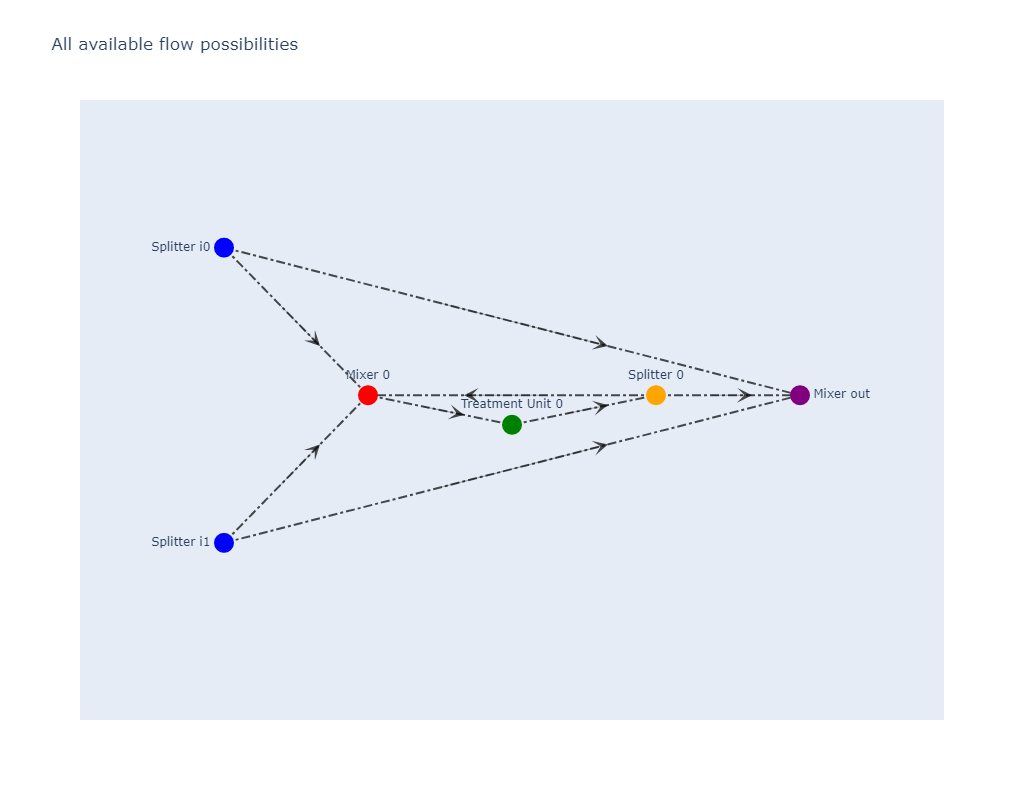

In [5]:
nodes_position_0 = {
    "Splitter i0": [(0, 15), "blue"],
    "Splitter i1": [(0, 5), "blue"],
    "Mixer 0": [(2, 10), "red"],
    "Treatment Unit 0": [(4, 9), "green"],
    "Splitter 0": [(6, 10), "orange"],
    "Mixer out": [(8, 10), "purple"],
}

create_complete_flow_graph(instance_0, nodes_position_0)

## Pyomo model
Let's write the model with the Pyomo modeler.

In [6]:
import pyomo.environ as pyo


def build_model(instance):

    # Create a model
    model = pyo.ConcreteModel()
    
    ##############
    # Pyomo sets #
    ##############

    nb_splitters = instance.nb_splitters_in + instance.nb_tu
    nb_mixers = instance.nb_tu + instance.nb_mixers_out

    # Contaminants.
    model.NC = pyo.RangeSet(0, instance.nb_contaminants - 1)
    # Inlet splitters.
    model.NSI = pyo.RangeSet(0, instance.nb_splitters_in - 1)
    # Oulet splitters.
    model.NSO = pyo.RangeSet(instance.nb_splitters_in, instance.nb_splitters_in + instance.nb_tu - 1)
    # All splitters.
    model.NS = pyo.RangeSet(0, nb_splitters - 1)
    # Inlet mixers.
    model.NMI = pyo.RangeSet(0, instance.nb_tu - 1)
    # Outlet mixer.
    m_o = instance.nb_tu
    # All mixers.
    model.NM = pyo.RangeSet(0, nb_mixers - 1)
    # Treatment units.
    model.NTU = pyo.RangeSet(0, instance.nb_tu - 1)
    # Inlet mixer / treatment unit / outlet splitter triplets.
    model.MTS = pyo.Set(initialize=instance.possible_triplets_mts, dimen=3)
    
    ####################
    # Create variables #
    ####################

    # Total flow from each splitter to each mixer.
    model.fsm = pyo.Var(model.NS, model.NM, within=pyo.NonNegativeReals)
    # Contaminant flow from each splitter to each mixer.
    model.fsmc = pyo.Var(model.NS, model.NM, model.NC, within=pyo.NonNegativeReals)
    # Total flow passing through each treatment unit.
    model.ft = pyo.Var(model.NTU, within=pyo.NonNegativeReals)
    # Contaminant flow entering each treatment unit.
    model.fitc = pyo.Var(model.MTS, model.NC, within=pyo.NonNegativeReals)
    # Contaminant flow leaving each treatment unit.
    model.fotc = pyo.Var(model.MTS, model.NC, within=pyo.NonNegativeReals)
    # Split fraction at each splitter.
    model.xsm = pyo.Var(model.NS, model.NM, within=pyo.NonNegativeReals, bounds=(0, 1))

    #############
    # Objective #
    #############

    model.objective = pyo.Objective(
        expr=pyo.quicksum(model.ft[i] for i in model.NTU), sense=pyo.minimize
    )

    ###############
    # Constraints #
    ###############

    def mass_balance_splitter_in_and_mixer_rule(model, s_i, m):
        return instance.total_flow_input[s_i] * model.xsm[s_i, m] == model.fsm[s_i, m]

    model.mass_balance_splitter_in_and_mixer = pyo.Constraint(
        model.NSI, model.NM, rule=mass_balance_splitter_in_and_mixer_rule
    )

    def contaminant_mass_balance_splitter_in_and_mixer_rule(model, s_i, m, c):
        return (
            instance.contaminant_flow_matrix[s_i][c] * model.xsm[s_i, m] == model.fsmc[s_i, m, c]
        )

    model.contaminant_mass_balance_splitter_in_and_mixer = pyo.Constraint(
        model.NSI,
        model.NM,
        model.NC,
        rule=contaminant_mass_balance_splitter_in_and_mixer_rule,
    )

    def mass_balance_splitter_out_and_mixer_rule(model, m, t, s, m1):
        return model.ft[t] * model.xsm[s, m1] == model.fsm[s, m1]

    model.mass_balance_splitter_out_and_mixer = pyo.Constraint(
        model.MTS, model.NM, rule=mass_balance_splitter_out_and_mixer_rule
    )

    def contaminant_mass_balance_splitter_out_and_mixer_rule(model, m, t, s, m1, c):
        return model.fotc[m, t, s, c] * model.xsm[s, m1] == model.fsmc[s, m1, c]

    model.contaminant_mass_balance_splitter_out_and_mixer = pyo.Constraint(
        model.MTS,
        model.NM,
        model.NC,
        rule=contaminant_mass_balance_splitter_out_and_mixer_rule,
    )

    def splitters_to_mixers_rule(model, s):
        return pyo.quicksum(model.xsm[s, m] for m in model.NM) == 1

    model.splitters_to_mixers = pyo.Constraint(model.NS, rule=splitters_to_mixers_rule)

    def conservation_splitter_out_rule(model, mi, t, s):
        return model.ft[t] == pyo.quicksum(model.fsm[s, m] for m in model.NM)

    model.conservation_splitter_out = pyo.Constraint(
        model.MTS, rule=conservation_splitter_out_rule
    )

    def contaminant_conservation_splitter_out_rule(model, mi, t, s, c):
        return model.fotc[mi, t, s, c] == pyo.quicksum(
            model.fsmc[s, m, c] for m in model.NM
        )

    model.contaminant_conservation_splitter_out = pyo.Constraint(
        model.MTS, model.NC, rule=contaminant_conservation_splitter_out_rule
    )

    def conservation_mixer_in_rule(model, m, t, s):
        return model.ft[t] == pyo.quicksum(model.fsm[s_t, m] for s_t in model.NS)

    model.conservation_mixer_in = pyo.Constraint(
        model.MTS, rule=conservation_mixer_in_rule
    )

    def contaminant_conservation_mixer_in_rule(model, m, t, s, c):
        return model.fitc[m, t, s, c] == pyo.quicksum(
            model.fsmc[s_t, m, c] for s_t in model.NS
        )

    model.contaminant_conservation_mixer_in = pyo.Constraint(
        model.MTS, model.NC, rule=contaminant_conservation_mixer_in_rule
    )

    def removal_rule(model, m, t, s, c):
        return (
            model.fotc[m, t, s, c]
            == (1 - instance.removal_tu_ratio[t][c]) * model.fitc[m, t, s, c]
        )

    model.removal = pyo.Constraint(model.MTS, model.NC, rule=removal_rule)

    def output_quality_rule(model, c):
        return pyo.quicksum(model.fsmc[s_t, m_o, c] for s_t in model.NS) <= sum(
            instance.total_flow_input[s_i] * instance.upper_limit_contaminants[c] for s_i in model.NSI
        )

    model.output_quality = pyo.Constraint(model.NC, rule=output_quality_rule)
    
    return model

In [7]:
# Build model
model_0 = build_model(instance_0)

# Solve model
solver = pyo.SolverFactory("knitroampl")
# Since the problem is nonconvex, we enable multistart.
solver.options["ms_enable"] = 1
results = solver.solve(model_0, tee=True)

Artelys Knitro 14.1.0: ms_enable=1

          Commercial License
         Artelys Knitro 14.1.0

Knitro using up to 8 threads.
No start point provided -- Knitro computing one.

Knitro presolve eliminated 11 variables and 11 constraints.

concurrent_evals         0
datacheck                0
hessian_no_f             1
hessopt                  1
ms_enable                1
The problem is identified as a QCQP.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Minimize
Objective type:  linear
Number of variables:                                 21 (          10)
    bounded below only:                              15 (           6)
    bounded above only:                               0 (           0)
    bounded below and above:                          6 (           4)
    fixed:                                            0 (           0)
    free:                                             0 (           0)
Number of constrai

## Output visualization

In [8]:
import numpy as np


def create_flow_graph(instance, model, nodes_position, contaminant_indices, shown_text):
    nb_splitters = instance.nb_splitters_in + instance.nb_tu
    nb_mixers = instance.nb_tu + instance.nb_mixers_out

    fig = go.Figure()
    index_arrow = 0

    def get_contaminant_text(suffix, values):
        text = f"Flow {suffix}: {round(values['total'], 2)} kg/h<br>"
        for c in contaminant_indices:
            text += f"Contaminant {c + 1}: {round(values[c], 2)} kg/h<br>"
        return text

    def add_arrow_text(x0, y0, x1, y1, text, i):
        fig.add_annotation(
            x=(2 * x1 + x0) / 3,
            y=(2 * y1 + y0) / 3,
            ax=(3 * x1 + 5 * x0) / 8,
            ay=(3 * y1 + 5 * y0) / 8,
            xref="x",
            yref="y",
            axref="x",
            ayref="y",
            text="",
            showarrow=True,
            arrowhead=3,
            arrowsize=5,
            arrowwidth=0.5,
            arrowcolor="black",
        )

        if shown_text:

            offset_x_list = [-1.5, 0, -1.5, 0, 0, 0]
            offset_y_list = [0, 1.5, 1, 1.5, 1.5, -1]
            offset_x = offset_x_list[i]
            offset_y = offset_y_list[i]
            fig.add_annotation(
                x=(x0 + x1 + offset_x) / 2,
                y=(y0 + y1 + offset_y) / 2,
                text=text,
                showarrow=False,
                font=dict(size=6, color="black"),
                align="center",
            )

    # Plot flows from splitter to mixer
    for s in model.NSI:
        for m in model.NM:
            flow_value = pyo.value(model.fsm[s, m])
            flow_contaminants = {
                c: pyo.value(model.fsmc[s, m, c]) for c in contaminant_indices
            }

            if all(val < 0.1 for val in flow_contaminants.values()):
                continue

            if flow_value > 0:
                x0, y0 = nodes_position[f"Splitter i{s}"][0]
                if m == nb_mixers - 1:
                    x1, y1 = nodes_position["Mixer out"][0]
                else:
                    x1, y1 = nodes_position[f"Mixer {m}"][0]

                fig.add_trace(
                    go.Scatter(
                        x=[x0, x1],
                        y=[y0, y1],
                        mode="lines",
                        line=dict(width=flow_value / 10000, color="black"),
                        showlegend=False,
                    )
                )

                fig.add_trace(
                    go.Scatter(
                        x=[(x0 + x1) / 2],
                        y=[(y0 + y1) / 2],
                        mode="markers",
                        marker=dict(size=0, color="rgba(0,0,0,0)"),
                        hoverinfo="text",
                        text=[
                            get_contaminant_text(
                                f"from Splitter i{s} to Mixer {m}",
                                {"total": flow_value, **flow_contaminants},
                            )
                        ],
                    )
                )

                add_arrow_text(
                    x0,
                    y0,
                    x1,
                    y1,
                    f"Flow: {round(flow_value, 2)} kg/h<br>Contaminant: {round(sum(flow_contaminants.values()), 2)} kg/h",
                    index_arrow,
                )
                index_arrow += 1

    # Plot flows from mixer to treatment unit
    for mi, t, s in model.MTS:
        flow_value = pyo.value(model.ft[t])
        flow_contaminants = {
            c: pyo.value(model.fitc[mi, t, s, c]) for c in contaminant_indices
        }

        if all(val < 0.1 for val in flow_contaminants.values()):
            continue

        if flow_value > 0:
            x0, y0 = nodes_position[f"Mixer {mi}"][0]
            x1, y1 = nodes_position[f"Treatment Unit {t}"][0]

            fig.add_trace(
                go.Scatter(
                    x=[x0, x1],
                    y=[y0, y1],
                    mode="lines",
                    line=dict(width=flow_value / 10000, color="black"),
                    showlegend=False,
                )
            )

            fig.add_trace(
                go.Scatter(
                    x=[(x0 + x1) / 2],
                    y=[(y0 + y1) / 2],
                    mode="markers",
                    marker=dict(size=0, color="rgba(0,0,0,0)"),
                    hoverinfo="text",
                    text=[
                        get_contaminant_text(
                            f"from Mixer {mi} to Treatment Unit {t}",
                            {"total": flow_value, **flow_contaminants},
                        )
                    ],
                )
            )

            add_arrow_text(
                x0,
                y0,
                x1,
                y1,
                f"Flow: {round(flow_value, 2)} kg/h<br>Contaminant: {round(sum(flow_contaminants.values()), 2)} kg/h",
                index_arrow,
            )
            index_arrow += 1

    # Plot flows from treatment unit to splitter out
    for m, t, so in model.MTS:
        flow_value = pyo.value(model.ft[t])
        flow_contaminants = {
            c: pyo.value(model.fotc[m, t, so, c]) for c in contaminant_indices
        }

        if all(val < 0.1 for val in flow_contaminants.values()):
            continue

        if flow_value > 0:
            x0, y0 = nodes_position[f"Treatment Unit {t}"][0]
            x1, y1 = nodes_position[f"Splitter {so - instance.nb_splitters_in}"][0]

            fig.add_trace(
                go.Scatter(
                    x=[x0, x1],
                    y=[y0, y1],
                    mode="lines",
                    line=dict(width=flow_value / 10000, color="black"),
                    showlegend=False,
                )
            )

            fig.add_trace(
                go.Scatter(
                    x=[(x0 + x1) / 2],
                    y=[(y0 + y1) / 2],
                    mode="markers",
                    marker=dict(size=0, color="rgba(0,0,0,0)"),
                    hoverinfo="text",
                    text=[
                        get_contaminant_text(
                            f"from Treatment Unit {t} to Splitter Out {so - instance.nb_splitters_in}",
                            {"total": flow_value, **flow_contaminants},
                        )
                    ],
                )
            )

            add_arrow_text(
                x0,
                y0,
                x1,
                y1,
                f"Flow: {round(flow_value, 2)} kg/h<br>Contaminant: {round(sum(flow_contaminants.values()), 2)} kg/h",
                index_arrow,
            )
            index_arrow += 1

    # Plot flows from splitter out to mixer
    for so in model.NSO:
        for m in model.NM:
            flow_value = pyo.value(model.fsm[so, m])
            flow_contaminants = {
                c: pyo.value(model.fsmc[so, m, c]) for c in contaminant_indices
            }

            if all(val < 0.1 for val in flow_contaminants.values()):
                continue

            if flow_value > 0:
                x0, y0 = nodes_position[f"Splitter {so - instance.nb_splitters_in}"][0]
                if m == nb_mixers - 1:
                    x1, y1 = nodes_position["Mixer out"][0]
                else:
                    x1, y1 = nodes_position[f"Mixer {m}"][0]

                fig.add_trace(
                    go.Scatter(
                        x=[x0, x1],
                        y=[y0, y1],
                        mode="lines",
                        line=dict(width=flow_value / 10000, color="black"),
                        showlegend=False,
                    )
                )

                fig.add_trace(
                    go.Scatter(
                        x=[(x0 + x1) / 2],
                        y=[(y0 + y1) / 2],
                        mode="markers",
                        marker=dict(size=0, color="rgba(0,0,0,0)"),
                        hoverinfo="text",
                        text=[
                            get_contaminant_text(
                                f"from Splitter {so - instance.nb_splitters_in} to Mixer {m}",
                                {"total": flow_value, **flow_contaminants},
                            )
                        ],
                    )
                )

                add_arrow_text(
                    x0,
                    y0,
                    x1,
                    y1,
                    f"Flow: {round(flow_value, 2)} kg/h<br>Contaminant: {round(sum(flow_contaminants.values()), 2)} kg/h",
                    index_arrow,
                )
                index_arrow += 1

    for node, pos in nodes_position.items():

        textposition = "top center"
        if node.startswith("Splitter i"):
            textposition = "middle left"
        elif node.startswith("Mixer out"):
            textposition = "middle right"

        fig.add_trace(
            go.Scatter(
                x=[pos[0][0]],
                y=[pos[0][1]],
                mode="markers+text",
                text=[node],
                textposition=textposition,
                marker=dict(size=20, color=pos[1]),
                showlegend=False,
            )
        )

    fig.update_layout(
        title="Flow network possible with the smallest flow entering the treatment unit",
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        showlegend=False,
        height=800,
        width=1024,
    )

    fig.update_layout(
        xaxis=dict(range=[-2, 10]), yaxis=dict(range=[-1, 20]), height=800
    )
    fig.show(fig_type)
    print(f"Objective cost is : {round(model.objective(),2)} kg/h")

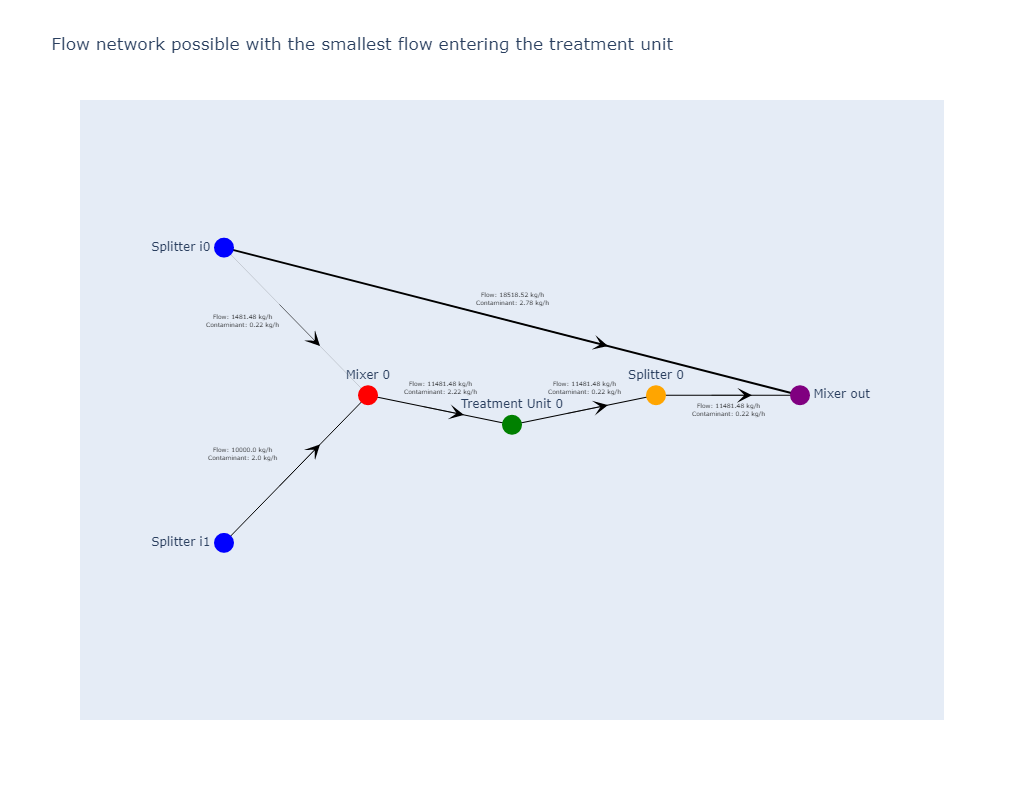

Objective cost is : 11481.48 kg/h


In [9]:
create_flow_graph(instance_0, model_0, nodes_position_0, [0], True)

We found the same result as previously. 

## Larger example
The first part features a highly minimalist model. The subsequent model, however, introduces more realistic elements. The dataset comes from Cheng et Li, 2020 [DOI](https://doi.org/10.1016/j.compchemeng.2019.106681)

### Input

In [10]:
instance_1 = Instance()

instance_1.nb_contaminants = 3
instance_1.nb_splitters_in = 3
instance_1.nb_mixers_out = 1
instance_1.nb_tu = 3

instance_1.contaminant_flow_matrix = [[12, 10, 10], [6, 3, 1.5], [1, 5, 1]]
instance_1.removal_tu_ratio = [[0.9, 0, 0], [0, 0.99, 0], [0, 0, 0.8]]
instance_1.possible_triplets_mts = [(0, 0, 3), (1, 1, 4), (2, 2, 5)]
instance_1.upper_limit_contaminants = [10e-5, 10e-5, 10e-5]
instance_1.total_flow_input = [20000, 15000, 5000]

### Input visualization

Let's visualize the instance.

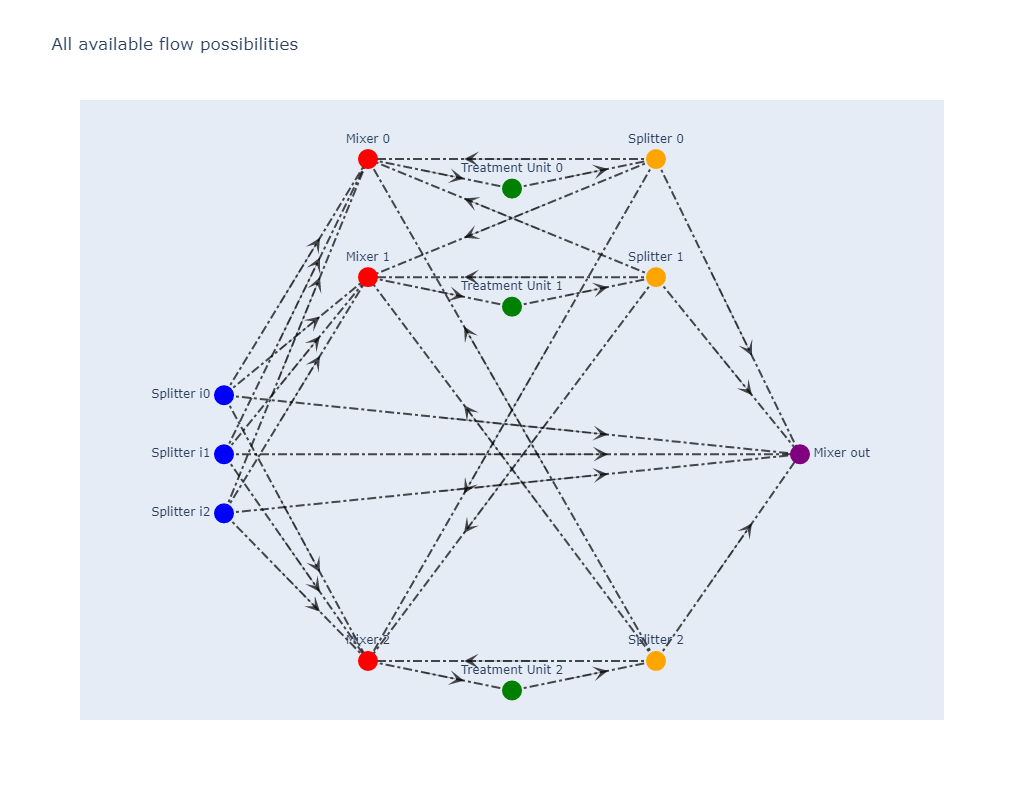

In [11]:
nodes_position_1 = {
    "Splitter i0": [(0, 10), "blue"],
    "Splitter i1": [(0, 8), "blue"],
    "Splitter i2": [(0, 6), "blue"],
    "Mixer 0": [(2, 18), "red"],
    "Mixer 1": [(2, 14), "red"],
    "Mixer 2": [(2, 1), "red"],
    "Treatment Unit 0": [(4, 17), "green"],
    "Treatment Unit 1": [(4, 13), "green"],
    "Treatment Unit 2": [(4, 0), "green"],
    "Splitter 0": [(6, 18), "orange"],
    "Splitter 1": [(6, 14), "orange"],
    "Splitter 2": [(6, 1), "orange"],
    "Mixer out": [(8, 8), "purple"],
}
create_complete_flow_graph(instance_1, nodes_position_1)

### Resolution

The model is the same as in the previous model, just the inputs change so we can reuse the previous function.

In [12]:
# Build model
model_1 = build_model(instance_1)

# Solve model
solver = pyo.SolverFactory("knitroampl")
solver.options["ms_enable"] = 1
results = solver.solve(model_1, tee=True)

Artelys Knitro 14.1.0: ms_enable=1

          Commercial License
         Artelys Knitro 14.1.0

Knitro using up to 8 threads.
No start point provided -- Knitro computing one.

Knitro presolve eliminated 57 variables and 57 constraints.

concurrent_evals         0
datacheck                0
hessian_no_f             1
hessopt                  1
ms_enable                1
The problem is identified as a QCQP.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Minimize
Objective type:  linear
Number of variables:                                141 (          84)
    bounded below only:                             117 (          63)
    bounded above only:                               0 (           0)
    bounded below and above:                         24 (          21)
    fixed:                                            0 (           0)
    free:                                             0 (           0)
Number of constrai

### Output Visualization

Let's visualize the solution.

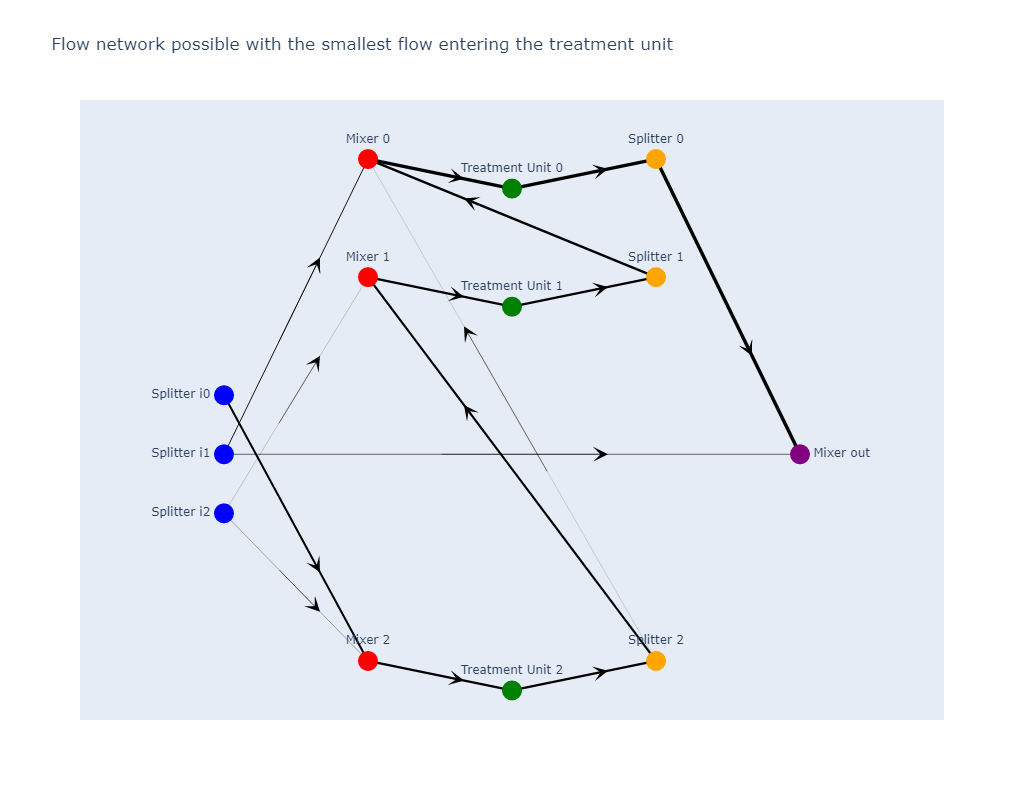

Objective cost is : 80778.92 kg/h


In [13]:
create_flow_graph(instance_1, model_1, nodes_position_1, [0, 1, 2], False)

In [14]:
print(
    f"Maximum flow allowed for each contaminant is { round(sum(instance_1.total_flow_input)*10e-5,2)} kg/h"
)

total_c1 = 0
total_c2 = 0
total_c3 = 0

for i in range(instance_1.nb_splitters_in + instance_1.nb_tu):
    if model_1.fsmc[i, 3, 0]():
        total_c1 += model_1.fsmc[i, 3, 0]()
        total_c2 += model_1.fsmc[i, 3, 1]()
        total_c3 += model_1.fsmc[i, 3, 2]()

print(f"Output flow for contaminant {1} is {round(total_c1,2)} kg/h")
print(f"Output flow for contaminant {2} is {round(total_c2,2)} kg/h")
print(f"Output flow for contaminant {3} is {round(total_c3,2)} kg/h")

Maximum flow allowed for each contaminant is 4.0 kg/h
Output flow for contaminant 1 is 4.0 kg/h
Output flow for contaminant 2 is 4.0 kg/h
Output flow for contaminant 3 is 4.0 kg/h


The flow entering Splitter i0 is highly concentrated in contaminants 1, 2, and 3, so it is essential that it first passes through the three treatment units to significantly reduce the concentration and thus help to meet the quality criteria. The flow entering Splitter i1 is very concentrated in contaminant 1, which is why a portion goes to Treatment Unit 0. A small portion can go to Mixer 3 since it is not very concentrated overall, allowing the criteria to be met without needing to send the entire flow to the treatment units. Splitter 2 is highly concentrated, particularly in contaminant 2, so it should primarily pass through Treatment Unit 1. However, it must still pass through the other treatment units to help stay below the threshold.

Here we can see that the threshold limit for the three contaminants is reached.

## Even larger example

Let's try another example with a higher number of units.

### Input

In [15]:
instance_2 = Instance()

instance_2.nb_contaminants = 5
instance_2.nb_splitters_in = 10
instance_2.nb_mixers_out = 1
instance_2.nb_tu = 8

# Let's generate the remaining data randomly.

import random
import numpy as np

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)

set_seed(1)

instance_2.contaminant_flow_matrix = []
for i in range(instance_2.nb_splitters_in):
    curr_splitter = []
    for j in range(instance_2.nb_contaminants):
        curr_splitter.append(round(random.randrange(0, 10), 1))
    instance_2.contaminant_flow_matrix.append(curr_splitter)

instance_2.removal_tu_ratio = []
for i in range(instance_2.nb_tu):
    current_tu = []
    for j in range(instance_2.nb_contaminants):
        current_tu.append(min(round(np.random.normal(0.75, 0.1), 2), 0.99))
    instance_2.removal_tu_ratio.append(current_tu)

instance_2.possible_triplets_mts = []
for i in range(instance_2.nb_tu):
    instance_2.possible_triplets_mts.append((i, i, i + instance_2.nb_splitters_in))

instance_2.upper_limit_contaminants = [10e-5 for i in range(instance_2.nb_contaminants)]

instance_2.total_flow_input = [random.randint(2000, 10000) for i in range(instance_2.nb_splitters_in)]

### Input visualization

Let's visualize the instance.

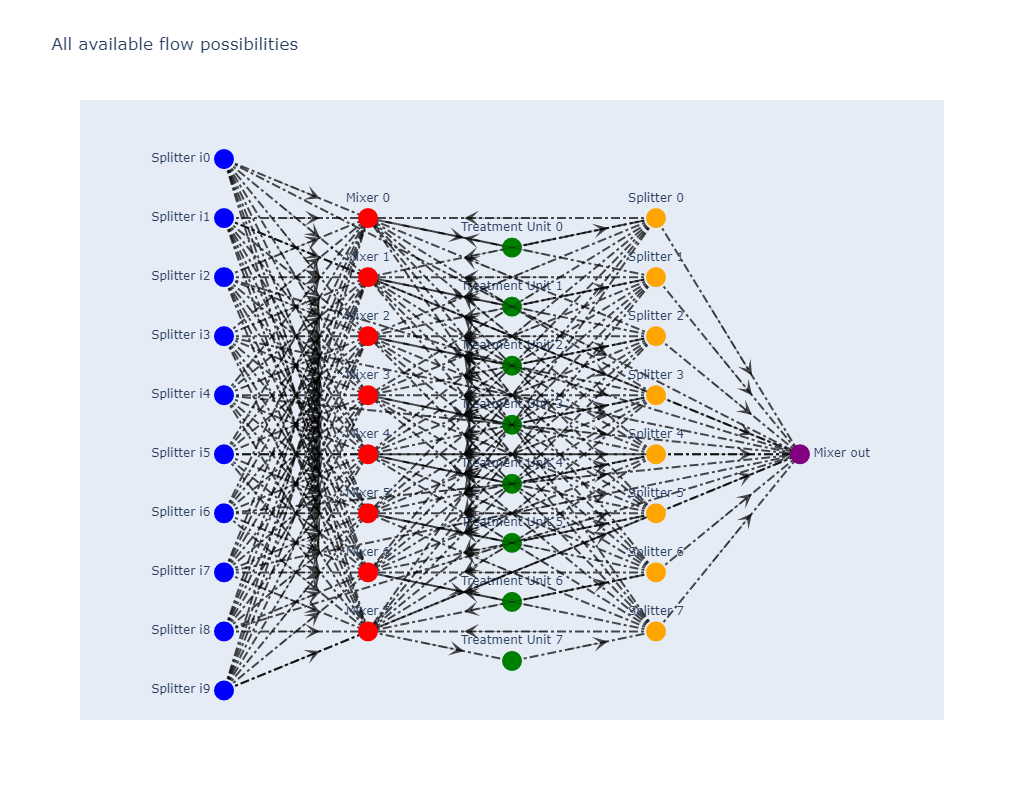

In [16]:
nodes_position_2 = {
    "Splitter i0": [(0, 18), "blue"],
    "Splitter i1": [(0, 16), "blue"],
    "Splitter i2": [(0, 14), "blue"],
    "Splitter i3": [(0, 12), "blue"],
    "Splitter i4": [(0, 10), "blue"],
    "Splitter i5": [(0, 8), "blue"],
    "Splitter i6": [(0, 6), "blue"],
    "Splitter i7": [(0, 4), "blue"],
    "Splitter i8": [(0, 2), "blue"],
    "Splitter i9": [(0, 0), "blue"],
    "Mixer 0": [(2, 16), "red"],
    "Mixer 1": [(2, 14), "red"],
    "Mixer 2": [(2, 12), "red"],
    "Mixer 3": [(2, 10), "red"],
    "Mixer 4": [(2, 8), "red"],
    "Mixer 5": [(2, 6), "red"],
    "Mixer 6": [(2, 4), "red"],
    "Mixer 7": [(2, 2), "red"],
    "Treatment Unit 0": [(4, 15), "green"],
    "Treatment Unit 1": [(4, 13), "green"],
    "Treatment Unit 2": [(4, 11), "green"],
    "Treatment Unit 3": [(4, 9), "green"],
    "Treatment Unit 4": [(4, 7), "green"],
    "Treatment Unit 5": [(4, 5), "green"],
    "Treatment Unit 6": [(4, 3), "green"],
    "Treatment Unit 7": [(4, 1), "green"],
    "Splitter 0": [(6, 16), "orange"],
    "Splitter 1": [(6, 14), "orange"],
    "Splitter 2": [(6, 12), "orange"],
    "Splitter 3": [(6, 10), "orange"],
    "Splitter 4": [(6, 8), "orange"],
    "Splitter 5": [(6, 6), "orange"],
    "Splitter 6": [(6, 4), "orange"],
    "Splitter 7": [(6, 2), "orange"],
    "Mixer out": [(8, 8), "purple"],
}

create_complete_flow_graph(instance_2, nodes_position_2)

### Resolution

In [17]:
# Build model
model_2 = build_model(instance_2)

# Solve model
solver = pyo.SolverFactory("knitroampl")
solver.options["ms_enable"] = 1
results = solver.solve(model_2, tee=True)

Artelys Knitro 14.1.0: ms_enable=1

          Commercial License
         Artelys Knitro 14.1.0

Knitro using up to 8 threads.
No start point provided -- Knitro computing one.

Knitro presolve eliminated 540 variables and 540 constraints.

concurrent_evals         0
datacheck                0
hessian_no_f             1
hessopt                  1
ms_enable                1
The problem is identified as a QCQP.

Problem Characteristics                                 (   Presolved)
-----------------------
Objective goal:  Minimize
Objective type:  linear
Number of variables:                               1222 (         682)
    bounded below only:                            1060 (         527)
    bounded above only:                               0 (           0)
    bounded below and above:                        162 (         155)
    fixed:                                            0 (           0)
    free:                                             0 (           0)
Number of constr

     78          7    -103         83194.3  1.03735e-09      1.00000      29.6430
     87          7       0         83091.0  1.00001e-10  9.14732e-07      9.18100
     76          6       0         83194.2  2.88464e-07  5.46985e-07      43.2090
     34          1    -400         83202.1  7.95552e-06      426.063      129.697
     83          7    -103         83198.3  2.75485e-10      1.00000      22.4150
     85          6    -103         83194.2  1.77160e-08      1.00000      34.7690
     90          6    -103         83091.0  1.24851e-08      1.00000      12.7110
     94          4    -103         83194.2  4.62023e-10  6.04759e-03      11.6740
     89          0    -103         83373.4  1.73902e-06      1.00000      22.5640
     95          5       0         83194.2  2.65437e-07  7.46547e-08      10.0810
     88          7    -103         84443.4  5.62250e-08      1.00000      24.9140
     97          2       0         84439.0  1.00001e-10  1.11175e-08      6.52500
     96         

### Output visualization

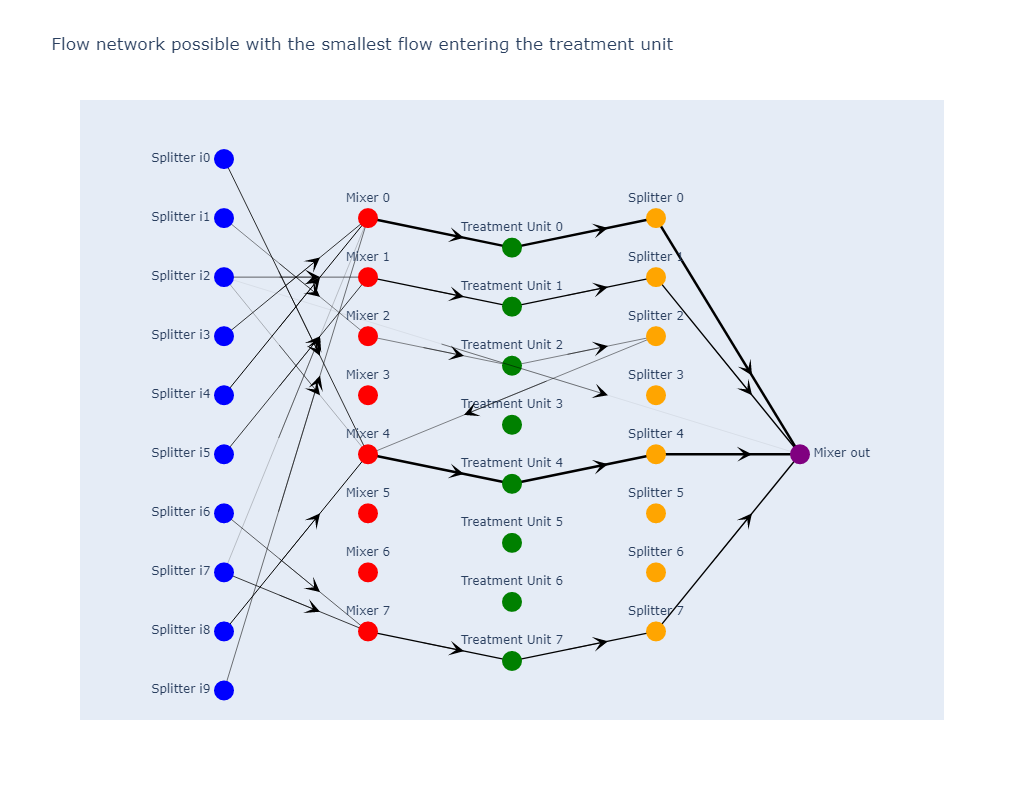

Objective cost is : 83030.75 kg/h


In [18]:
create_flow_graph(instance_2, model_2, nodes_position_2, [0, 1, 2, 3, 4], False)

In [19]:
print(
    f"Maximum flow allowed for each contaminant is { round(sum(instance_2.total_flow_input)*10e-5,2)} kg/h"
)

total_c1 = 0
total_c2 = 0
total_c3 = 0
total_c4 = 0
total_c5 = 0

for i in range(instance_2.nb_splitters_in + instance_2.nb_tu):
    if model_2.fsmc[i, 8, 0]():
        total_c1 += model_2.fsmc[i, 8, 0]()
        total_c2 += model_2.fsmc[i, 8, 1]()
        total_c3 += model_2.fsmc[i, 8, 2]()
        total_c4 += model_2.fsmc[i, 8, 3]()
        total_c5 += model_2.fsmc[i, 8, 4]()

print(f"Output flow for contaminant {1} is {round(total_c1,2)} kg/h")
print(f"Output flow for contaminant {2} is {round(total_c2,2)} kg/h")
print(f"Output flow for contaminant {3} is {round(total_c3,2)} kg/h")
print(f"Output flow for contaminant {4} is {round(total_c4,2)} kg/h")
print(f"Output flow for contaminant {5} is {round(total_c5,2)} kg/h")

Maximum flow allowed for each contaminant is 7.9 kg/h
Output flow for contaminant 1 is 7.9 kg/h
Output flow for contaminant 2 is 7.9 kg/h
Output flow for contaminant 3 is 7.9 kg/h
Output flow for contaminant 4 is 7.9 kg/h
Output flow for contaminant 5 is 6.17 kg/h
